In [45]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import StrMethodFormatter

behav_eco = {
    'heuristics': [0.8188887626976022, [3.21658787e-04, 2.00107531e+03, 1.42063595e+01, 3.83717572e-05]],
    'errors': [0.6696833172773802, [1.49137495e-04, 1.99610309e+03, 1.16816998e+01, 3.67346134e-05]],
    'kahneman': [0.6407939794794867, [2.75052844e-04, 1.99612350e+03, 2.83420985e+01, 1.91744464e-05]],
    'heuristic': [0.5782504027945948, [4.13278411e-04, 1.99922915e+03, 5.25278046e-01, 8.85498663e-06]],
    'thaler': [0.5627202984964532, [1.14278396e-04, 1.99601003e+03, 1.39779318e+01, 1.86632582e-05]],
    'tversky': [0.4333583899700456, [9.50190108e-05, 1.99602894e+03, 3.81866075e+01, 8.13287901e-06]],
    'quasi-rational': [0.47869898820982315, [1.38057377e-05, 1.99607788e+03, 2.11263620e+01, 1.19741221e-06]],
    'bounded': [0.472007438349199, [ 2.04407197e-04,  1.99603098e+03,  1.25770038e+01, -2.22856246e-06]],
    'availability': [0.47881445922996535, [3.23808375e-04, 1.99704783e+03, 2.24848406e+00, 5.02064558e-05]],
    'irrationality': [0.41938506879872006, [-1.25630637e-04,  1.99195507e+03,  1.27635215e+01,  1.43053708e-04]]
}
# Irrationality -> concept trop large, reste explique

eco = {
    'economics': [0.6257286563340716, [4.29239006e-04, 1.99684450e+03, 1.02111701e+01, 1.03788723e-04]],
    'cost-benefit': [0.42965946021995083, [4.55117009e-04, 1.99502547e+03, 2.74340258e+01, 5.20665847e-05]],
    'utility': [0.41202339317801573, [8.51369366e-05, 1.99220835e+03, 1.25050087e+01, 1.75338684e-05]]
}

republicanism = {
    'citizenship': [0.4956245796747718, [-1.25774115e-04,  1.99448484e+03,  8.91773288e-01,  1.38865250e-04]],
    'pocock': [0.4921156012044091, [-1.81440565e-04,  1.98853925e+03,  3.35029033e+01,  1.82526604e-04]],
    'republican': [0.4518763271895988, [-1.47504908e-03,  1.98854244e+03,  3.59171382e+01,  1.60758157e-03]],
    'republicanism': [0.4208110711854425, [-2.90288191e-04,  1.99121840e+03,  1.34525170e+01,  2.99029880e-04]],
    'aristotle': [0.4247135207278394, [-2.96638528e-05,  1.99198370e+03,  1.10043827e+01,  3.32236903e-05]]
}

misc = {
    'posner': [0.776591984493477, [6.48564399e-04, 2.00069880e+03, 3.08190702e+00, 1.45537059e-04]],
    'psychology': [0.7274457527856442, [1.23187907e-04, 1.99602481e+03, 2.11086132e+01, 9.08122001e-06]],
    'experiment': [0.6487644272256994, [8.12426841e-05, 1.99625135e+03, 3.88225068e+00, 1.51443840e-05]],
    'experiments': [0.5564229235891438, [9.14219524e-05, 1.99589025e+03, 9.37237346e-01, 1.12932750e-05]],
    'cognition': [0.5006844765854283, [8.61609795e-05, 2.00002206e+03, 3.68301242e+01, 1.52901706e-05]],
    'distributional': [0.49190432790678307, [7.46766611e-05, 1.99451877e+03, 6.57612950e+00, 6.75380246e-06]],
    'constitutionalism': [0.4446632692336534, [-1.66704210e-04,  1.99394867e+03,  9.80840304e-01,  1.92646255e-04]],
    'libertarian': [0.4192980339616551, [1.87146363e-04, 2.00208701e+03, 1.42209477e+01, 3.64181887e-06]],
    'liberalism': [0.40443524297760036, [-1.24325836e-04,  1.99655674e+03,  1.99513938e+00,  1.26039352e-04]]
}

def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k*(x - x0))) + b


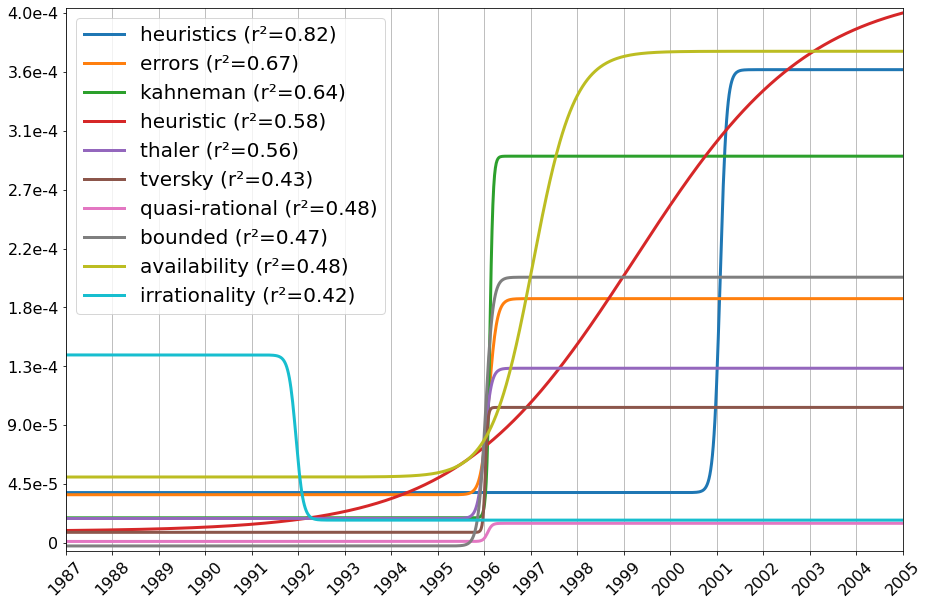

In [81]:
x = np.linspace(1987, 2005, 1000)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

dic = behav_eco

y_max = 0

for word in dic:
    y = sigmoid(x, *dic[word][1])
    y_max = max(y_max, max(y))
    plt.plot(x, y, label=word + ' (r²=' + str(round(dic[word][0], 2)) + ')', linewidth=3)

plt.legend(loc="upper left", prop={'size': 20})
plt.xticks(np.arange(1987, 2006, step=1), fontsize=16, rotation=45)
plt.yticks(np.linspace(0, y_max, 10), fontsize=16)
plt.grid(visible=True, axis='x')
plt.margins(x=0, y=0.01)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.1E}'))

plt.draw()

ylabels = plt.gca().get_yticklabels()

for i, label in enumerate(ylabels):
    if label.get_text() == '0.0E+00':
        ylabels[i] = '0'
    else:
        ylabels[i] = label.get_text().replace('E-0', 'e-').replace('E+0', 'e+')

plt.gca().set_yticklabels(ylabels)
plt.show()

/tmp/ipykernel_690/2085383483.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(ylabels)


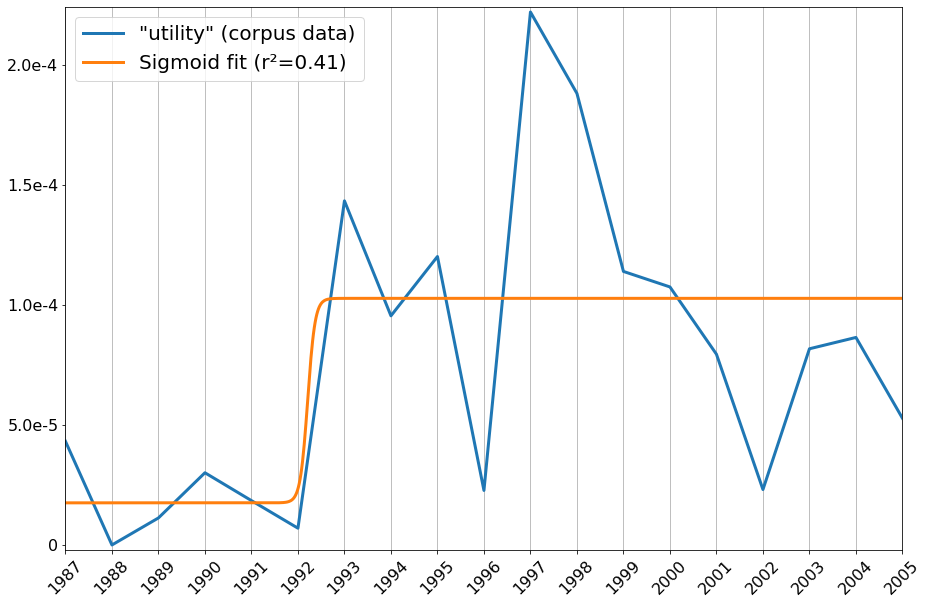

In [93]:
data = [4.31678279e-05, 0.00000000e+00, 1.12534042e-05, 3.00610239e-05, 1.84617657e-05, 6.97968215e-06,
        1.43253771e-04, 9.53934070e-05, 1.20082395e-04, 2.26952930e-05, 2.21870927e-04, 1.87964729e-04,
        1.13874527e-04, 1.07415872e-04, 7.94051421e-05, 2.30730539e-05, 8.16726560e-05, 8.63930886e-05,
        5.27552916e-05]

fig = plt.figure(figsize=(15, 10))
plt.plot(np.arange(1987, 2006, 1), data, label='"utility" (corpus data)', linewidth=3)
plt.plot(x, sigmoid(x, *eco['utility'][1]), label='Sigmoid fit (r²=' + str(round(eco['utility'][0], 2)) + ')', linewidth=3)
plt.legend(loc="upper left", prop={'size': 20})
plt.xticks(np.arange(1987, 2006, step=1), fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.grid(visible=True, axis='x')
plt.margins(x=0, y=0.01)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.1E}'))

plt.draw()

ylabels = plt.gca().get_yticklabels()

for i, label in enumerate(ylabels):
    if label.get_text() == '0.0E+00':
        ylabels[i] = '0'
    else:
        ylabels[i] = label.get_text().replace('E-0', 'e-').replace('E+0', 'e+')

plt.gca().set_yticklabels(ylabels)
plt.show()

/tmp/ipykernel_690/2897909399.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(ylabels)


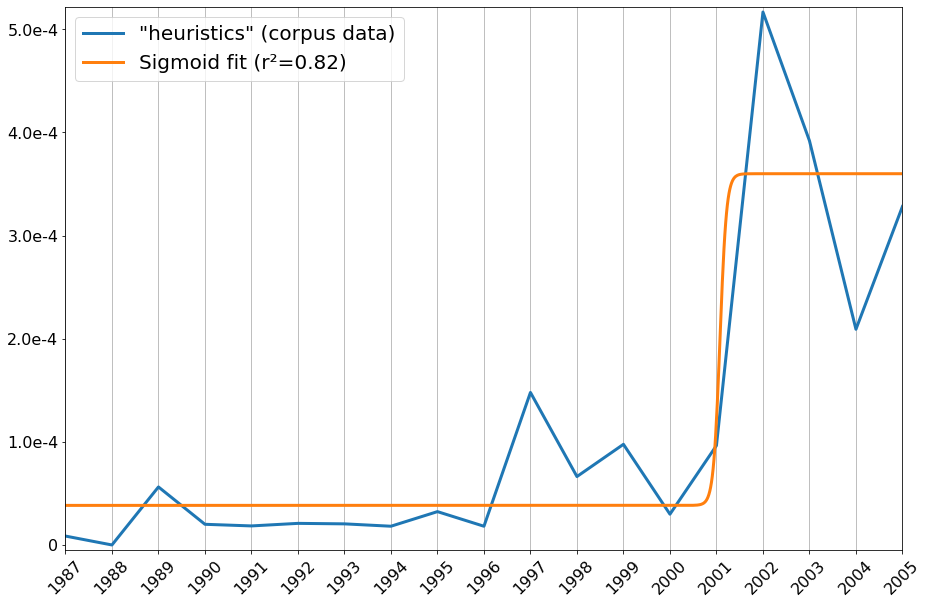

In [94]:
data = [8.63356558e-06, 0.00000000e+00, 5.62670208e-05, 2.00406826e-05, 1.84617657e-05, 2.09390464e-05,
         2.04648244e-05, 1.81701728e-05, 3.23298756e-05, 1.81562344e-05, 1.47913951e-04, 6.63404926e-05,
         9.76067370e-05, 2.98377424e-05, 9.64205296e-05, 5.16836407e-04, 3.92028749e-04, 2.09162214e-04,
         3.28255148e-04]

fig = plt.figure(figsize=(15, 10))
plt.plot(np.arange(1987, 2006, 1), data, label='"heuristics" (corpus data)', linewidth=3)
plt.plot(x, sigmoid(x, *behav_eco['heuristics'][1]), label='Sigmoid fit (r²=' + str(round(behav_eco['heuristics'][0], 2)) + ')', linewidth=3)
plt.legend(loc="upper left", prop={'size': 20})
plt.xticks(np.arange(1987, 2006, step=1), fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.grid(visible=True, axis='x')
plt.margins(x=0, y=0.01)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.1E}'))

plt.draw()

ylabels = plt.gca().get_yticklabels()

for i, label in enumerate(ylabels):
    if label.get_text() == '0.0E+00':
        ylabels[i] = '0'
    else:
        ylabels[i] = label.get_text().replace('E-0', 'e-').replace('E+0', 'e+')

plt.gca().set_yticklabels(ylabels)
plt.show()